In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

print("Feature Matrix (X):")
display(X.head())

print("\nTarget Vector (y):")
display(y.head())

Feature Matrix (X):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



Target Vector (y):


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 309 samples
Testing set size: 133 samples


In [6]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()



print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     32.01
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           9.91e-42
Time:                        05:42:35   Log-Likelihood:                -1673.8
No. Observations:                 309   AIC:                             3370.
Df Residuals:                     298   BIC:                             3411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7556      3.166     48.569      0.0

In [8]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_sm.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_train_sm.values, i)
    for i in range(X_train_sm.shape[1])
]
print("\n Variance Inflation Factor ")
print(vif_data)


 Variance Inflation Factor 
   feature        VIF
0    const   1.006082
1      age   1.247466
2      sex   1.282689
3      bmi   1.458038
4       bp   1.357800
5       s1  55.437435
6       s2  37.681129
7       s3  14.807333
8       s4   8.393280
9       s5  10.872927
10      s6   1.470356


In [9]:
y_pred = lr_model.predict(X_test_sm)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Mean Squared Error (MSE): {mse:.2f}")
print(f"Test Set R-squared: {r2:.4f}")


Test Set Mean Squared Error (MSE): 2687.16
Test Set R-squared: 0.4929


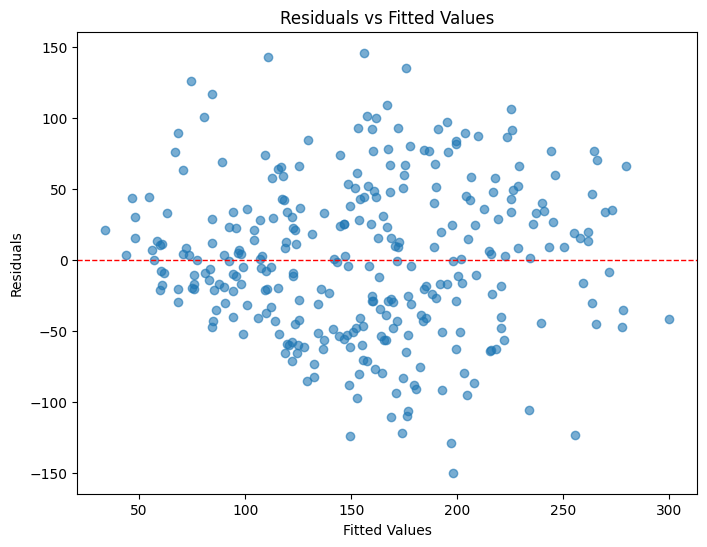

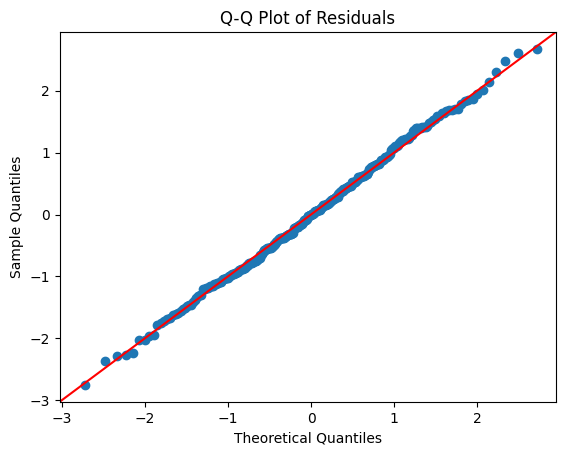

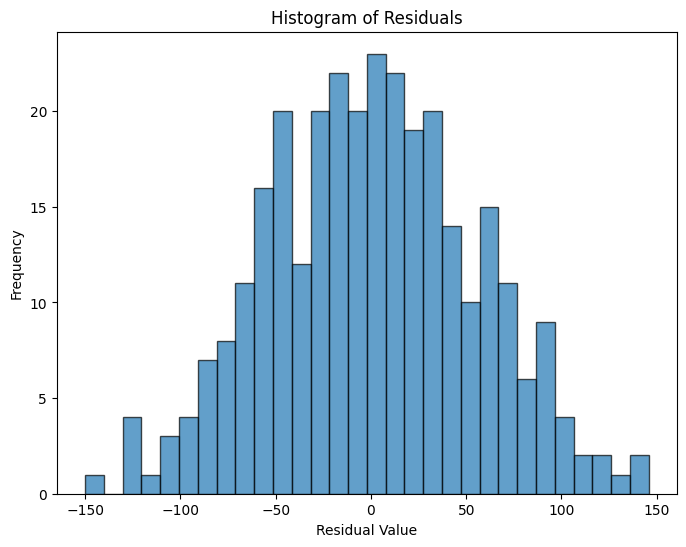

In [10]:
residuals = y_train - lr_model.predict(X_train_sm)

plt.figure(figsize=(8, 6))
plt.scatter(lr_model.predict(X_train_sm), residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

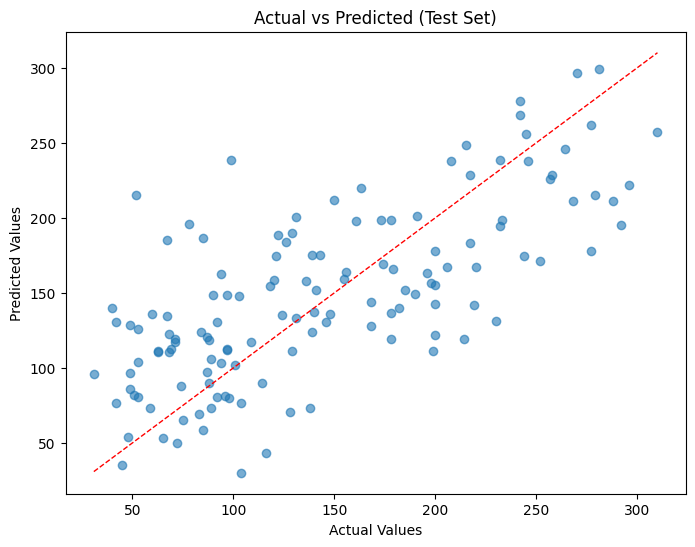

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Test Set)')
plt.show()